In [ ]:
#  Algorithm steps
# STEP 1: Cgoose the number K of neighbors

# STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

# STEP 3: Among these K neighbors, count the number of data points to each category

# STEP 4: Assign the new data point to the category where you counted the most neighbors

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
iris = load_iris()


In [24]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])


In [25]:
print(df.head())
print(df.describe())
print(df['target_name'].value_counts())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.6

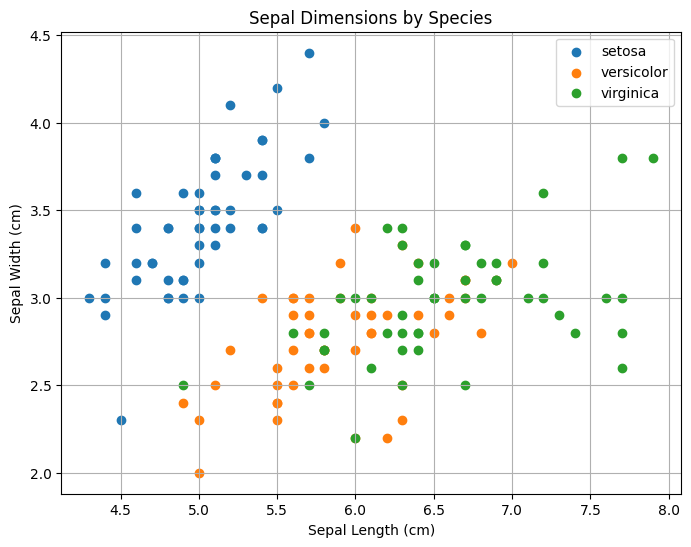

In [26]:
plt.figure(figsize=(8,6))
for i, species in enumerate(iris.target_names):
    plt.scatter(df[df['target'] == i]['sepal length (cm)'],
                df[df['target'] == i]['sepal width (cm)'],
                label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Dimensions by Species')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
df.groupby('target_name').size()


,0
target_name,
setosa,50
versicolor,50
virginica,50


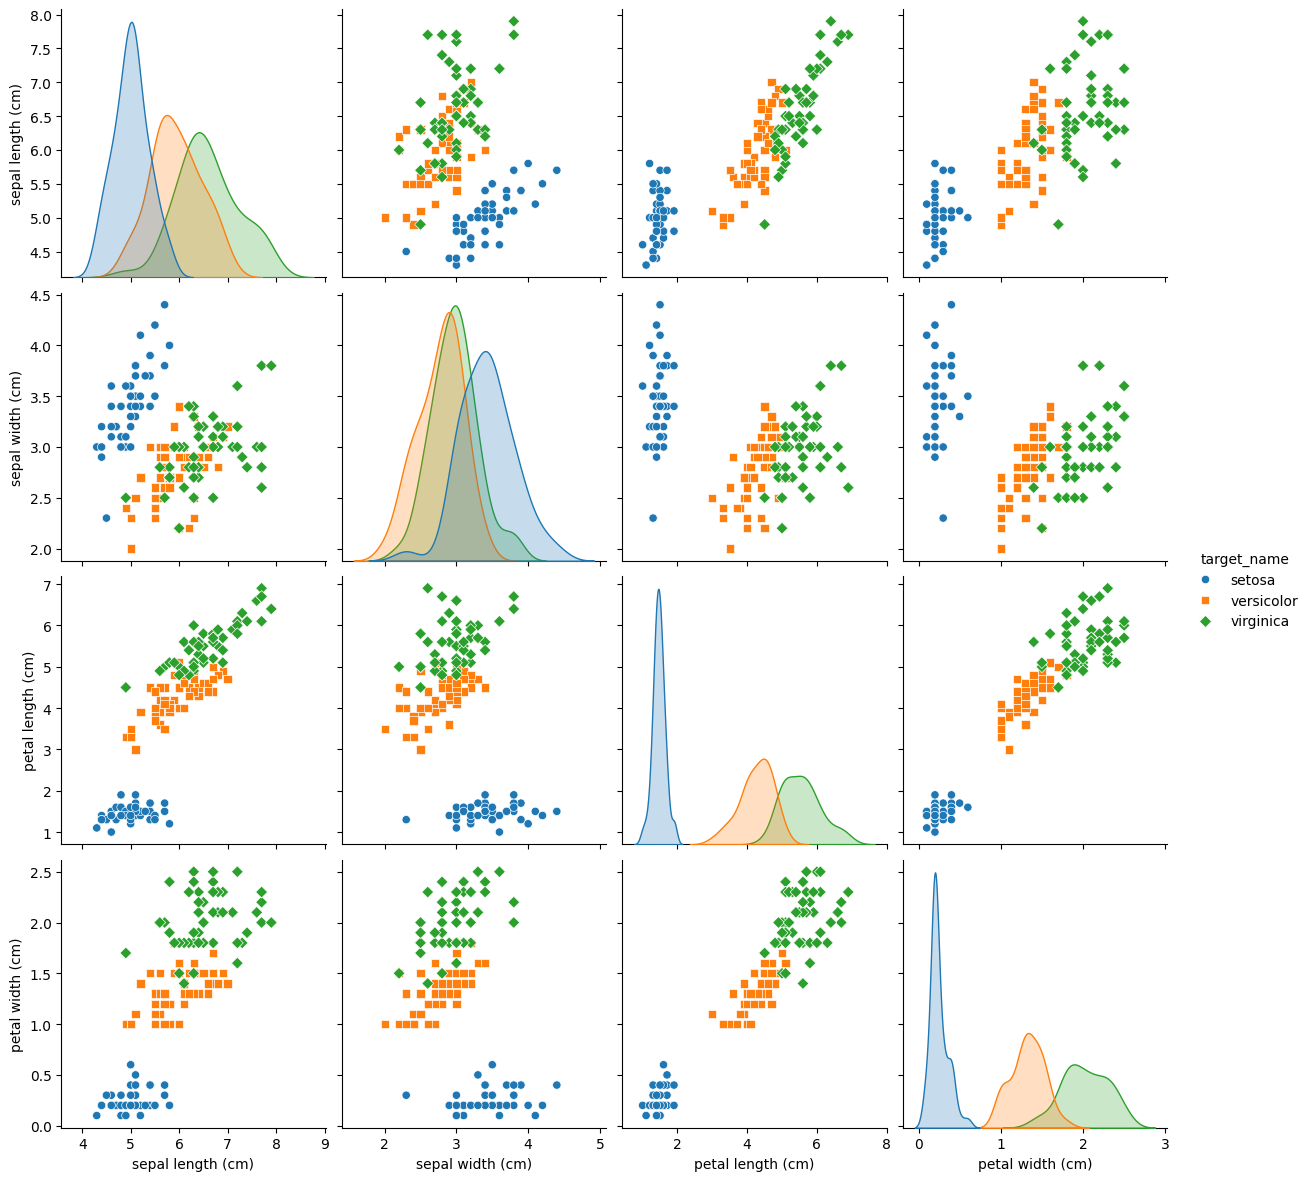

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.drop(columns=["target"]), hue="target_name", height=3, markers=["o", "s", "D"])
plt.show()


<Figure size 1500x1000 with 0 Axes>

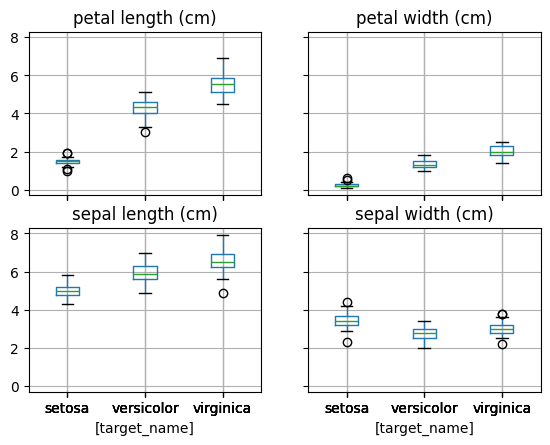

In [29]:
plt.figure(figsize=(15,10))
df.drop(columns=["target"]).boxplot(by="target_name")
plt.suptitle("")
plt.show()


In [30]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of our model is equal {round(accuracy, 2)} %.')


Accuracy of our model is equal 100.0 %.


In [31]:
from sklearn.metrics import mean_squared_error

MSE = []
k_list = list(range(1, 21))

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_k)
    MSE.append(mse)

best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}.")


The optimal number of neighbors is 1.


In [32]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

